In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('C:\\Users\\KIIT\\Downloads\\Customers.csv')
products = pd.read_csv('C:\\Users\\KIIT\\Downloads\\Products.csv')
transactions = pd.read_csv('C:\\Users\\KIIT\\Downloads\\Transactions.csv')

# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Preview datasets
print("Customers Dataset:")
print(customers.head(), "\n")
print("Products Dataset:")
print(products.head(), "\n")
print("Transactions Dataset:")
print(transactions.head(), "\n")

# Check for missing values
print("Missing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Merge data for analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Display merged dataset
print("Merged Dataset:")
print(merged_data.head())


Customers Dataset:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C012

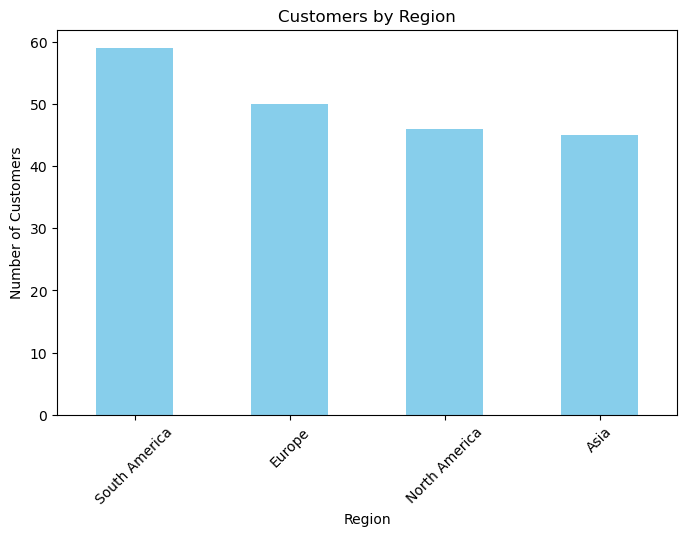

In [3]:
# Count customers by region
region_count = customers['Region'].value_counts()

# Plot customers by region
plt.figure(figsize=(8, 5))
region_count.plot(kind='bar', color='skyblue')
plt.title('Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

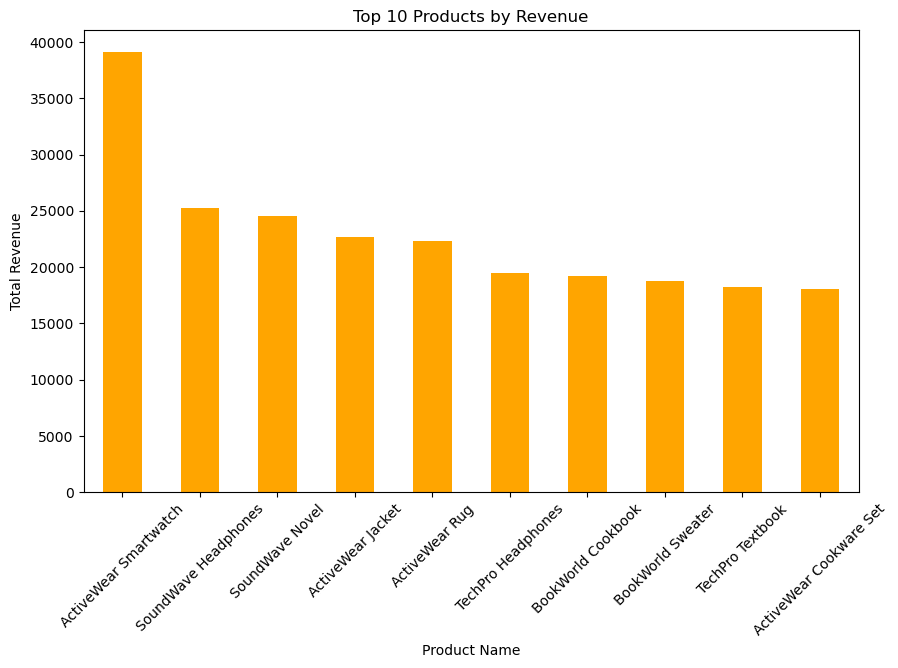

In [4]:
# Calculate total revenue for each product
product_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Plot top 10 products by revenue
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


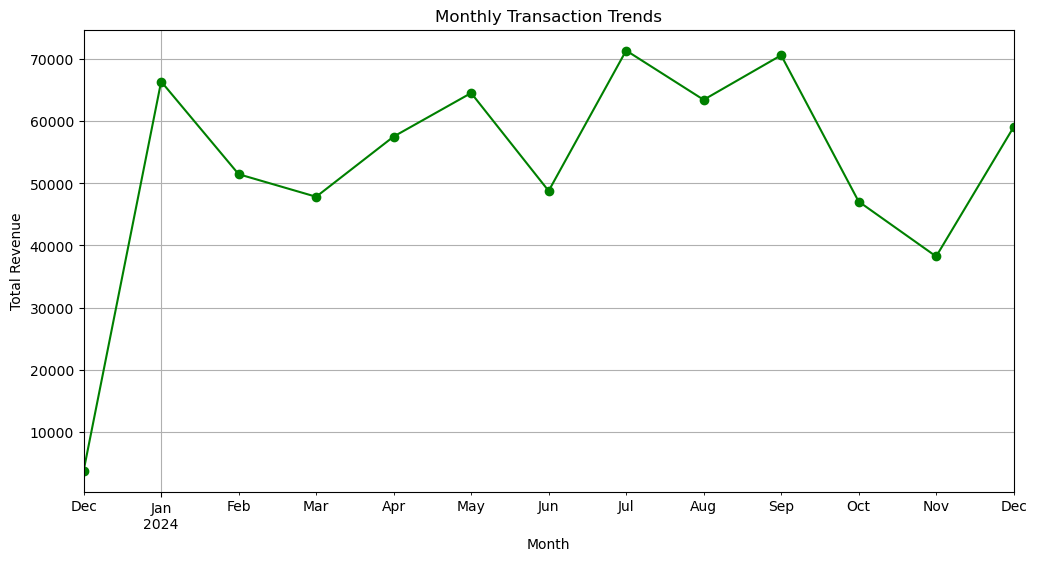

In [5]:
# Extract month-year from TransactionDate
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')

# Calculate monthly revenue
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()

# Plot monthly revenue trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


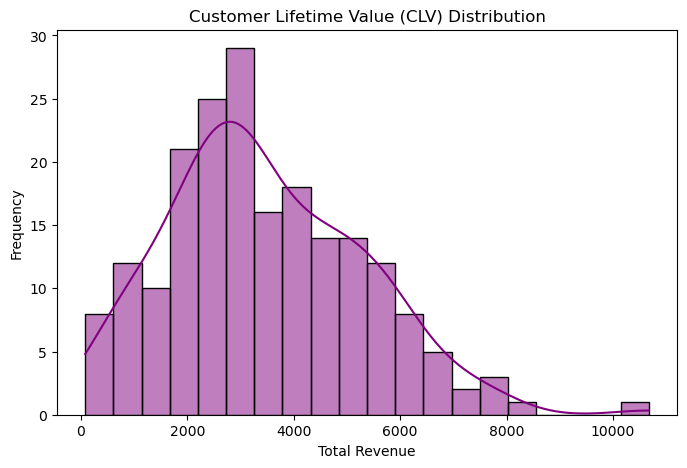

In [6]:
# Calculate CLV for each customer
clv = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Plot distribution of CLV
plt.figure(figsize=(8, 5))
sns.histplot(clv, bins=20, kde=True, color='purple')
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()


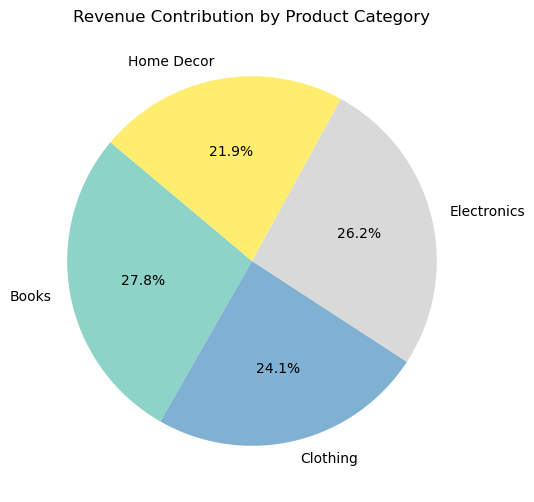

In [7]:
# Calculate revenue contribution by category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum()

# Plot revenue by product category
plt.figure(figsize=(8, 6))
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Revenue Contribution by Product Category')
plt.ylabel('')
plt.show()
